In [1]:
from IPython.display import display, HTML, Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer
from sklearn import metrics

# to avoid future warnings for sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV file
dataset = pd.read_csv('foodtruck.csv')
print("Dataset.shape: " + str(dataset.shape))

# split the features-X and class labels-y
X = dataset.iloc[:, :-12]
y = dataset.iloc[:, -12:]

print("X.shape: " + str(X.shape))
display(X.head())
print("y.shape: " + str(y.shape))
display(y.head())
print("Descriptive stats:")
X.describe()

Dataset.shape: (407, 33)
X.shape: (407, 21)


frequency  time  expenses  motivation  taste  hygiene  menu  presentation  \
0          2     1        30           1      5        4     4             3   
1          0     1        20           2      5        2     4             4   
2          1     2        15           2      5        2     2             5   
3          0     3        40           1      5        5     4             3   
4          0     1        15           4      5        4     2             3   

   attendance  ingredients  ...  takeaway  variation  stop.strucks  schedule  \
0           4            4  ...         3          3             2         2   
1           4            4  ...         2          3             1         4   
2           3            5  ...         2          2             2         1   
3           4            4  ...         4          5             1         1   
4           4            4  ...         3          4             1         1   

   gender  age.group  scholarity  average.income  has.work  marital.status  
0       1          2         1.5               4         0               1  
1       0          3         2.0               5         1               0  
2       1          2         1.5               4         1               1  
3       1          3         2.0               6         1               1  
4       1          2         1.5               4         1               1  

[5 rows x 21 columns]

y.shape: (407, 12)


street_food  gourmet  italian_food  brazilian_food  mexican_food  \
0            1        0             0               0             0   
1            1        0             1               0             1   
2            1        0             0               1             0   
3            0        1             0               0             0   
4            1        0             0               0             0   

   chinese_food  japanese_food  arabic_food  snacks  healthy_food  \
0             0              0            0       0             0   
1             0              0            0       0             0   
2             0              0            0       0             0   
3             0              0            0       0             0   
4             0              0            0       0             0   

   fitness_food  sweets_desserts  
0             0                1  
1             0                1  
2             0                0  
3             0                0  
4             0                0

Descriptive stats:


frequency        time    expenses  motivation       taste     hygiene  \
count  407.000000  407.000000  407.000000  407.000000  407.000000  407.000000   
mean     0.761671    1.918919   21.486486    2.469287    4.771499    4.651106   
std      0.987461    1.423176    7.247503    1.314345    0.595032    0.699150   
min      0.000000    1.000000   15.000000    1.000000    1.000000    1.000000   
25%      0.000000    1.000000   15.000000    1.000000    5.000000    4.000000   
50%      0.000000    1.000000   20.000000    2.000000    5.000000    5.000000   
75%      1.000000    2.000000   20.000000    4.000000    5.000000    5.000000   
max      4.000000    5.000000   50.000000    5.000000    5.000000    5.000000   

             menu  presentation  attendance  ingredients  ...    takeaway  \
count  407.000000    407.000000  407.000000   407.000000  ...  407.000000   
mean     3.773956      4.272727    4.535627     4.481572  ...    2.732187   
std      1.097696      0.877647    0.724711     0.799649  ...    0.982367   
min      1.000000      1.000000    1.000000     1.000000  ...    1.000000   
25%      3.000000      4.000000    4.000000     4.000000  ...    2.000000   
50%      4.000000      4.000000    5.000000     5.000000  ...    3.000000   
75%      5.000000      5.000000    5.000000     5.000000  ...    3.000000   
max      5.000000      5.000000    5.000000     5.000000  ...    5.000000   

        variation  stop.strucks    schedule      gender   age.group  \
count  407.000000    407.000000  407.000000  407.000000  407.000000   
mean     3.420147      2.690418    2.663391    0.481572    2.358722   
std      1.070374      1.283653    1.356325    0.500275    1.412145   
min      1.000000      1.000000    1.000000    0.000000    1.000000   
25%      3.000000      2.000000    1.000000    0.000000    2.000000   
50%      4.000000      3.000000    3.000000    0.000000    2.000000   
75%      4.000000      4.000000    4.000000    1.000000    3.000000   
max      5.000000      5.000000    5.000000    1.000000    8.000000   

       scholarity  average.income    has.work  marital.status  
count  407.000000      407.000000  407.000000      407.000000  
mean     1.640049        2.958231    0.511057        0.867322  
std      0.907029        1.569640    0.500493        0.367509  
min      0.000000        1.000000    0.000000        0.000000  
25%      1.000000        2.000000    0.000000        1.000000  
50%      1.500000        3.000000    1.000000        1.000000  
75%      2.000000        4.000000    1.000000        1.000000  
max      5.000000        6.000000    1.000000        2.000000  

[8 rows x 21 columns]

In [3]:
# Normalise the data
X = (X-X.min())/(X.max()-X.min())

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.7)

print("X_train.shape: " + str(X_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape: " + str(y_test.shape))

X_train.shape: (284, 21)
X_test.shape: (123, 21)
y_train.shape: (284, 12)
y_test.shape: (123, 12)


In [4]:
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_classifier=RandomForestClassifier(criterion='entropy')):
        self.base_classifier=base_classifier

    def fit(self, X, y):
        """Build a Binary Relevance classifier from the training set (X, y).
        Parameters
        ----------
        X : array-like or sparse matrix, shape = [n_samples, n_features]
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like, shape = [n_samples, n_labels] 
            The target values (class labels) as integers or strings.
        """

        # list of individual classifiers
        self.models = []
       
        # for every class label
        for label in list(y.columns):
            # Check that X and y have correct shape
            x_checked, y_checked = check_X_y(X, y[label])
            # every classifier is independent of the others
            # hence we create a copy of the base classifier instance
            base_model = clone(self.base_classifier)
            # fit the base model - one model each for Y1, Y2....Y14
            basel_model = base_model.fit(x_checked, y_checked)
            # add the fitted model list of individual classifiers
            self.models.append(base_model)

    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i=0
        # list of individual classifier predictions
        preds = []
        
        # predict against each fitted model - one model per label
        for model in self.models:
            pred = model.predict(X)
            # add the prediction to the dataframe
            preds.append(pd.DataFrame({'Class'+ str(i+1): pred}))
            i+=1
        
        # dataframe with predictions for all class labels
        all_preds = pd.concat(preds, axis=1)
        # standard sklearn classifiers return predictions as numpy arrays
        # hence convert the dataframe to a numpy array
        return all_preds.to_numpy()
    


    def predict_proba(self,X):
        # check if the models list has been set up
        check_is_fitted(self, ['models'])
        X = check_array(X)
        
        all_preds = pd.DataFrame()
        i = 0
        
        for model in self.models:
            # Call predict_proba of the each base model
            pred = model.predict_proba(X)
            # Add the probabilities of 1 to the dataframe
            all_preds['Class'+str(i+1)] = [one_prob[1] for one_prob in pred]
            i+=1
        
        #return probabilities
        return all_preds.to_numpy()

In [5]:
# instantiate the classifier
br_clf = BinaryRelevanceClassifier(RandomForestClassifier(criterion='entropy'))
# fit
br_clf.fit(X_train, y_train)
# predict
y_pred = br_clf.predict(X_test)
print("y_pred.shape: " + str(y_pred.shape))

y_pred.shape: (123, 12)


## Permutation Feature Importance

In [6]:
import eli5
from eli5.sklearn import PermutationImportance

In [7]:
perms_br = PermutationImportance(br_clf).fit(X_test,y_test)
eli5.show_weights(perms_br,top=21,feature_names = X.columns.tolist())

In [8]:
from sklearn.inspection import permutation_importance

In [9]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)   # unit: inches

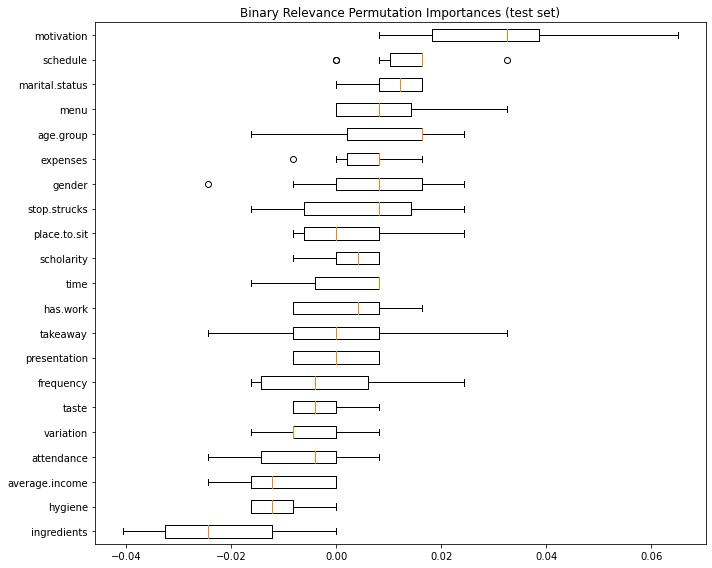

In [10]:
result_br_clf = permutation_importance(br_clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result_br_clf.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_br_clf.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Binary Relevance Permutation Importances (test set)")
fig.tight_layout()
plt.show()


## LIME

In [11]:
import lime
import lime.lime_tabular
from __future__ import print_function
np.random.seed(1)

In [12]:
# Creating the Lime Explainer
# Be very careful in setting the order of the class names
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="lasso_path",
    class_names=["street_food","gourmet","italian_food","brazilian_food","mexican_food","chinese_food","japanese_food","arabic_food","snacks","healthy_food","fitness_food","sweets_desserts"],
    discretize_continuous=True,
    discretizer="entropy",
)

In [13]:
#Now let's pick a sample case from our test set.
row = 10
exp = lime_explainer.explain_instance(X_test.iloc[row], br_clf.predict_proba, num_features=21)
exp.show_in_notebook(show_table=True)

In [14]:
#Now let's pick a sample case from our test set.
row = 100
exp = lime_explainer.explain_instance(X_test.iloc[row], br_clf.predict_proba, num_features=21)
exp.show_in_notebook(show_table=True)

## SHAP

In [15]:
import shap
import time
shap.initjs()

In [16]:
#First, build the explainer.
explainer_BR = shap.KernelExplainer(br_clf.predict_proba,X_train)

Using 284 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


### Calculate SHAP values of Sample 11（row=10）

In [17]:
shap_values = explainer_BR.shap_values(X_test.iloc[10,:])

#### Explanation of Sample 1 for the first label "street_food"

In [19]:
shap.force_plot(explainer_BR.expected_value[0], shap_values[0], X_test.iloc[0,:])

#### Explanation of Sample 1 for the first label "snacks"

In [20]:
shap.force_plot(explainer_BR.expected_value[8], shap_values[8], X_test.iloc[0,:])

#### Explanation of Sample 1 for the first label "sweets_desserts"

In [21]:
shap.force_plot(explainer_BR.expected_value[11], shap_values[11], X_test.iloc[0,:])

#### Explanation of Sample 1 for the first label "brazilian_food"

In [22]:
shap.force_plot(explainer_BR.expected_value[3], shap_values[3], X_test.iloc[0,:])

#### Explanation of Sample 10 for the other labels

In [23]:
shap.force_plot(explainer_BR.expected_value[1], shap_values[1], X_test.iloc[0,:])

In [24]:
shap.force_plot(explainer_BR.expected_value[2], shap_values[2], X_test.iloc[0,:])

In [25]:
shap.force_plot(explainer_BR.expected_value[4], shap_values[4], X_test.iloc[0,:])

In [26]:
shap.force_plot(explainer_BR.expected_value[5], shap_values[5], X_test.iloc[0,:])

In [27]:
shap.force_plot(explainer_BR.expected_value[6], shap_values[6], X_test.iloc[0,:])

In [28]:
shap.force_plot(explainer_BR.expected_value[7], shap_values[7], X_test.iloc[0,:])

In [29]:
shap.force_plot(explainer_BR.expected_value[9], shap_values[9], X_test.iloc[0,:])

In [30]:
shap.force_plot(explainer_BR.expected_value[10], shap_values[10], X_test.iloc[0,:])

### Calculate SHAP values of Sample 101（row=100）

In [31]:
shap_values = explainer_BR.shap_values(X_test.iloc[100,:])

In [32]:
shap.force_plot(explainer_BR.expected_value[0], shap_values[0], X_test.iloc[100,:])

In [33]:
shap.force_plot(explainer_BR.expected_value[11], shap_values[11], X_test.iloc[100,:])

In [34]:
shap.force_plot(explainer_BR.expected_value[1], shap_values[1], X_test.iloc[100,:])

In [35]:
shap.force_plot(explainer_BR.expected_value[2], shap_values[2], X_test.iloc[100,:])

#### Explanation of Sample 100 for the other labels

In [36]:
shap.force_plot(explainer_BR.expected_value[3], shap_values[3], X_test.iloc[100,:])

In [37]:
shap.force_plot(explainer_BR.expected_value[4], shap_values[4], X_test.iloc[100,:])

In [38]:
shap.force_plot(explainer_BR.expected_value[5], shap_values[5], X_test.iloc[100,:])

In [39]:
shap.force_plot(explainer_BR.expected_value[6], shap_values[6], X_test.iloc[100,:])

In [40]:
shap.force_plot(explainer_BR.expected_value[7], shap_values[7], X_test.iloc[100,:])

In [41]:
shap.force_plot(explainer_BR.expected_value[8], shap_values[8], X_test.iloc[100,:])

In [42]:
shap.force_plot(explainer_BR.expected_value[9], shap_values[9], X_test.iloc[100,:])

In [43]:
shap.force_plot(explainer_BR.expected_value[10], shap_values[10], X_test.iloc[100,:])

In [44]:
# using kmeans
X_train_summary = shap.kmeans(X_train, 10)
explainer_BR = shap.KernelExplainer(br_clf.predict_proba, X_train_summary)
shap_values_KNN_test = explainer_BR.shap_values(X_test)

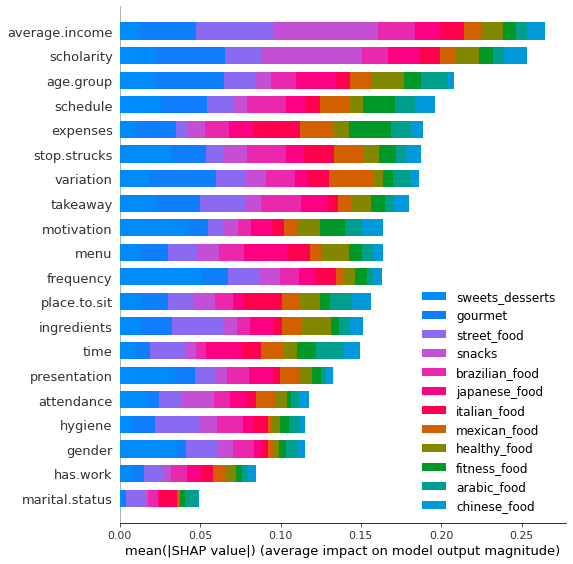

In [45]:
shap.summary_plot(shap_values_KNN_test, X, plot_type="bar",class_names = y.columns.tolist())

### sweets_desserts

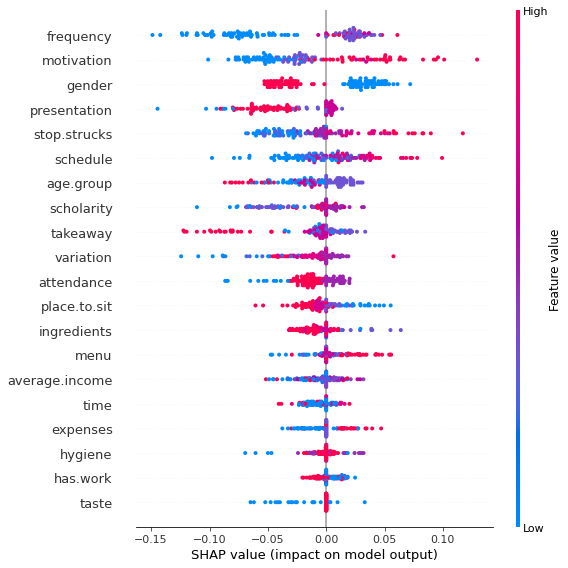

In [48]:
shap.summary_plot(shap_values_KNN_test[11], X_test)

### Street food

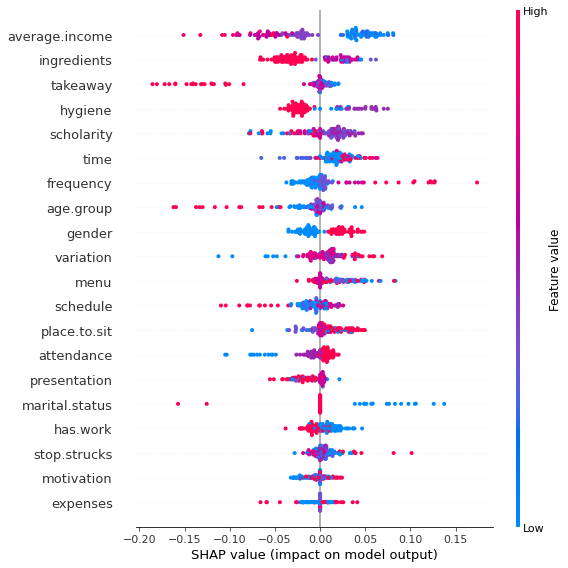

In [46]:
shap.summary_plot(shap_values_KNN_test[0], X_test)

### snacks

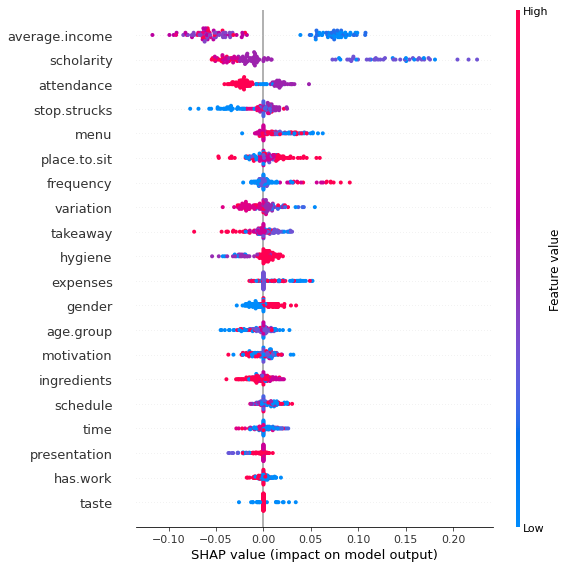

In [49]:
shap.summary_plot(shap_values_KNN_test[8], X_test)

### italian_food

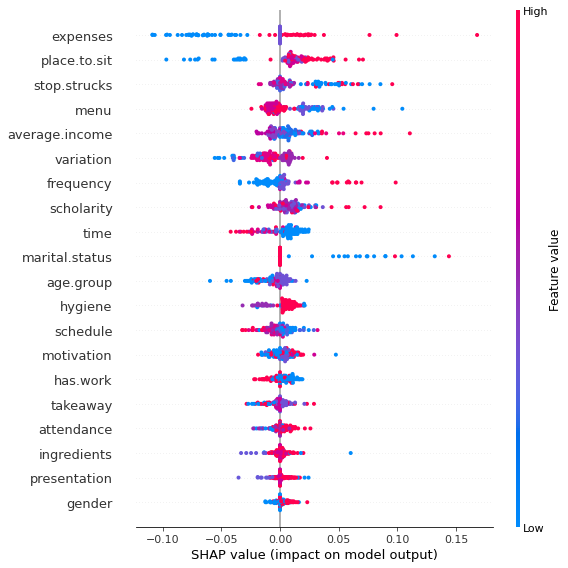

In [50]:
shap.summary_plot(shap_values_KNN_test[2], X_test)

### Feature "average.income" on Label "snacks"

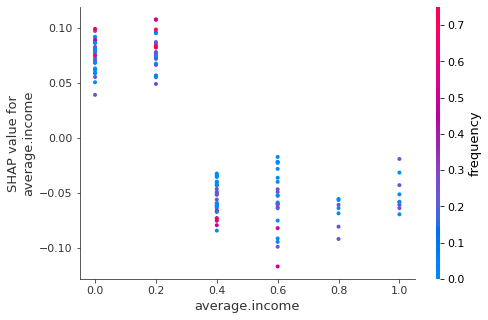

In [51]:
shap.dependence_plot("average.income", shap_values_KNN_test[8], X_test)

### Feature "attendance" on label "street food"

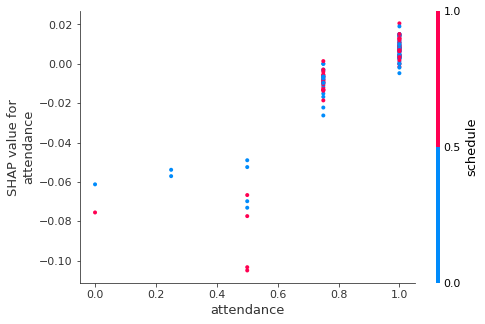

In [53]:
shap.dependence_plot("attendance", shap_values_KNN_test[0], X_test)

### Feature "schedule" on label "sweets_desserts"

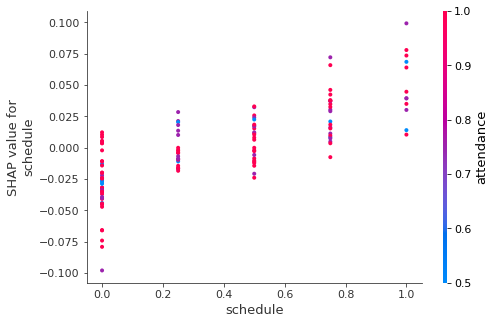

In [54]:
shap.dependence_plot("schedule", shap_values_KNN_test[11], X_test)

### Feature "menu" on label "italien_food"

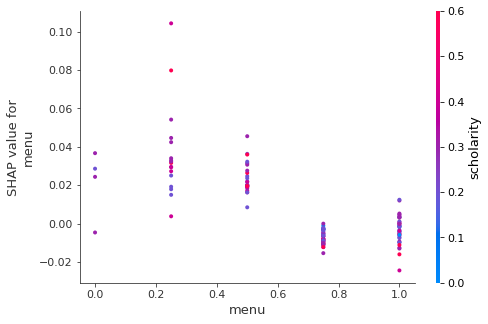

In [55]:
shap.dependence_plot("menu", shap_values_KNN_test[2], X_test)